In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
from causalimpact import CausalImpact
import plotly.express as px

from scipy import optimize
import matplotlib.pyplot as plt
# import the datetime module
import datetime as dt
import time
import matplotlib.patches as mpatches
from datetime import datetime
from utiles import *

import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm

import peca

In [4]:
#wikipediaapi_accidents contains the airplane crushes accidents view logs
wikipediaapi_accidents=pd.read_csv("wikipediaapi_accidents.csv")
wikipediaapi_accidents=wikipediaapi_accidents[wikipediaapi_accidents['Category']=='Category:Airliner accidents and incidents caused by pilot error']
wikipediaapi_accidents=wikipediaapi_accidents.set_index('Unnamed: 0')
wikipediaapi_accidents['Event date'] = pd.to_datetime(wikipediaapi_accidents['Event date'])
wikipediaapi_accidents['Event date']=[d.date() for d in wikipediaapi_accidents['Event date']]

# logs smoothed monthly window
df=wikipediaapi_accidents.iloc[:,:-3].T
df.index = pd.to_datetime(df.index)
df1=df.rolling(7).mean().iloc[6:,:]

df2=df[df.columns[df.mean()>50]]
df_2019=wikipediaapi_accidents[wikipediaapi_accidents['Event date']>dt.date(2015,1,1)]
df3=df_2019.iloc[:,:-3].T
df3=df3.rolling(7).mean().iloc[6:,:]
df3=df3[df3.columns[df3.mean()>5]]

lst=df3.columns
df_peak_timestamps=ts2peak(lst)
df_peak_timestamps


date_range=df3.index
indexs = wikipediaapi_accidents[['Event date']].groupby("Event date").sum().index.copy()
eventseries = pd.Series(index=indexs, data=([1] * len(indexs)),name="GTD").reindex(date_range).fillna(0).values
timeseries_df=df3.copy()
keywords = timeseries_df.columns

In [94]:
df3.index= pd.to_datetime(df3.index)

In [95]:
df3

Unnamed: 0,1946 Railway Air Services Dakota crash,1990 Faucett Perú Boeing 727 disappearance,1991 Vallejo helicopter crash,Aeroflot Flight 2808,Aeroflot Flight 6709,Aeroméxico Connect Flight 2431,Air Canada Flight 624,Air Canada Flight 759,Air Caraïbes Flight 1501,Airborne Express Flight 827,...,Scandinavian Airlines System Flight 901,Thomson Airways Flight 1526,Trans International Airlines Flight 863,Trans-Colorado Airlines Flight 2286,TransAsia Airways Flight 235,TransAsia Airways Flight 791,Transbrasil Flight 801,US-Bangla Airlines Flight 211,Uzbekistan Airways Flight 1154,West Air Sweden Flight 294
2015-07-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,319.857143,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3554.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-07-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,310.714286,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3437.142857,0.000000,0.000000,0.000000,0.000000,0.000000
2015-07-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.142857,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1375.428571,0.000000,0.000000,0.000000,0.000000,0.000000
2015-07-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,263.857143,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,798.571429,0.000000,0.000000,0.000000,0.000000,0.000000
2015-07-11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,262.714286,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,683.428571,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-28,4.857143,86.857143,34.714286,16.857143,8.285714,59.857143,68.857143,168.714286,20.714286,28.000000,...,18.285714,13.857143,24.571429,86.571429,702.000000,23.142857,7.714286,251.714286,8.142857,86.571429
2022-07-29,5.714286,85.857143,35.857143,17.571429,9.142857,62.285714,70.714286,171.714286,19.571429,27.142857,...,17.428571,12.285714,24.857143,87.571429,827.142857,24.142857,8.142857,251.285714,8.285714,85.000000
2022-07-30,5.428571,86.000000,35.000000,18.285714,9.142857,61.857143,72.142857,173.285714,19.714286,27.714286,...,18.428571,11.000000,26.142857,89.000000,802.714286,23.857143,9.000000,251.000000,8.571429,83.571429
2022-07-31,23.000000,87.142857,37.000000,17.714286,8.000000,64.142857,71.142857,169.857143,18.714286,26.142857,...,18.285714,12.714286,24.428571,86.857143,758.714286,22.428571,9.571429,277.142857,8.714286,78.285714


In [11]:
lst=df3.columns
df_peak_timestamps=ts2peak(lst)
df_peak_timestamps

,Timestamps,right_ips,left_ips,right_bases,left_bases,prominences,Value,widths,width_heights,days,months,year,event,distance_2_peak
0,2018-01-31,918.865909,888.898190,1050,192,12.966667,18.866667,29.967719,12.383333,Wednesday,1.0,2018.0,1946 Railway Air Services Dakota crash,NaT
1,2018-07-07,1088.613527,1058.698020,1094,1050,10.133333,17.266667,29.915507,12.200000,Saturday,7.0,2018.0,1946 Railway Air Services Dakota crash,157 days
2,2018-10-27,1200.536986,1170.484765,1237,192,16.466667,25.233333,30.052222,17.000000,Saturday,10.0,2018.0,1946 Railway Air Services Dakota crash,112 days
3,2019-02-27,1312.880851,1282.088608,1802,192,41.800000,46.366667,30.792243,25.466667,Wednesday,2.0,2019.0,1946 Railway Air Services Dakota crash,123 days
4,2020-01-01,1640.346154,1587.876812,1802,1508,18.433333,24.166667,52.469342,14.950000,Wednesday,1.0,2020.0,1946 Railway Air Services Dakota crash,308 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,2022-03-09,2417.355107,2413.229938,2424,2412,16.633333,132.433333,4.125169,124.116667,Wednesday,3.0,2022.0,West Air Sweden Flight 294,15 days
32,2022-04-06,2443.159851,2433.911392,2444,2346,15.066667,224.133333,9.248459,216.600000,Wednesday,4.0,2022.0,West Air Sweden Flight 294,28 days
33,2022-04-19,2457.935302,2427.048327,2535,2346,145.533333,238.933333,30.886975,166.166667,Tuesday,4.0,2022.0,West Air Sweden Flight 294,13 days
34,2022-06-02,2512.163121,2492.110266,2535,2481,27.466667,125.900000,20.052854,112.166667,Thursday,6.0,2022.0,West Air Sweden Flight 294,44 days


In [2]:
def exponential_ma_model(length, order):
    timeseries = np.random.exponential(size=length)
    if order > 1:
        timeseries = np.convolve(timeseries, [1./order] * order, mode="same")
        timeseries = (timeseries-timeseries.mean())/timeseries.std()
        timeseries = timeseries-timeseries.min()
    return timeseries

## Canonical trigger coincidence processes and corresponding QTR plot, for a simulated time series and two event series (independent and dependent).

In [159]:
# random data or data from paper?
random_data = False

if random_data:
    length = 500
    delta = 7
    n_events = 32
    order = 8
    shift = 4
    timeseries = exponential_ma_model(length, order)
    eventseries_ind = np.zeros(length)
    eventseries_ind[np.random.choice(range(length-delta),
                                     size=n_events,
                                     replace=False)] = 1
    eventseries_dep = np.zeros(length)
    eventseries_dep[np.random.choice(np.where(timeseries > 4)[0] - shift,
                                     size=n_events, replace=False)] = 1
else:
    # load data from the paper
    data = df3.copy()
    timeseries = data.iloc[:,5].values
    length = len(timeseries)
    n_events = eventseries_dep.sum()

In [160]:
indexs = df_peak_timestamps[df_peak_timestamps['prominences']>200][['Timestamps']].groupby("Timestamps").sum().index.copy()
eventseries_dep = pd.Series(index=indexs, data=([1] * len(indexs)),name="GTD").reindex(date_range).fillna(0).values

In [161]:
wikipediaapi_accidents['Event date']= pd.to_datetime(wikipediaapi_accidents['Event date'])
indexs = wikipediaapi_accidents[['Event date']].groupby("Event date").sum().index.copy()
eventseries_ind = pd.Series(index=indexs, data=([1] * len(indexs)),name="bb").reindex(date_range).fillna(0).values

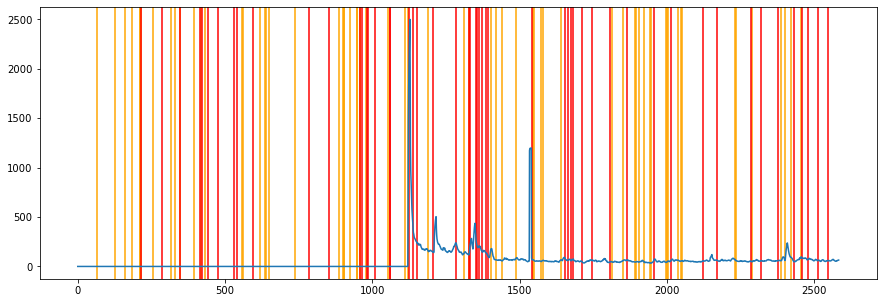

In [162]:
plt.figure(figsize=(15, 5))
for event in np.where(eventseries_ind == 1)[0]:
    plt.axvline(event, c="orange")
for event in np.where(eventseries_dep == 1)[0]:
    plt.axvline(event, c="red")
plt.plot(timeseries)

plt.show()

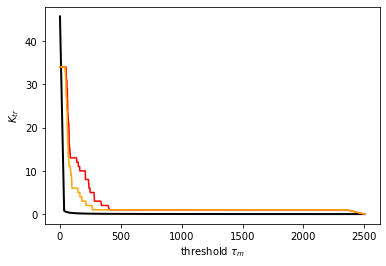

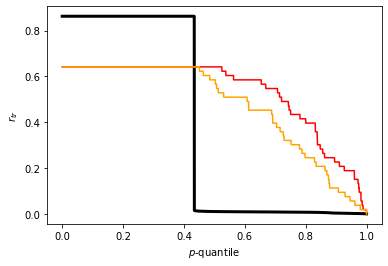

In [163]:
delta = 7
taus = np.sort(timeseries)  # for canonical process

tcp_params = peca.tcp_params_fit(timeseries, delta, taus)
tcp_ind = peca.tcp(timeseries, eventseries_ind, delta, taus)
tcp_dep = peca.tcp(timeseries, eventseries_dep, delta, taus)

plt.plot(taus, peca.tcp_marginal_expectation(n_events, tcp_params),
         c="black", lw=2)
plt.plot(taus, tcp_dep, c="red")
plt.plot(taus, tcp_ind, c="orange")
plt.xlabel("threshold $\\tau_m$")
plt.ylabel("$K_{tr}$")
plt.show()

plt.plot(np.linspace(1. / length, 1, length),
         peca.tcp_marginal_expectation(n_events, tcp_params) / n_events,
         c="black", lw=3)
plt.plot(np.linspace(1. / length, 1, length), tcp_dep / n_events, c="red")
plt.plot(np.linspace(1. / length, 1, length), tcp_ind / n_events, c="orange")
plt.xlabel("$p$-quantile")
plt.ylabel("$r_{tr}$")
plt.show()

In [174]:
timeseries = exponential_ma_model(length, order)
timeseries

array([0.47542817, 1.24880454, 1.263544  , ..., 1.41074249, 0.64014024,
       0.27310111])

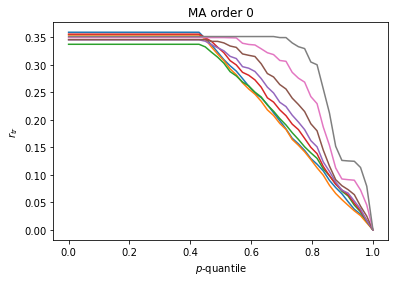

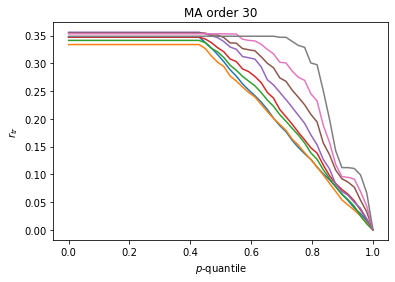

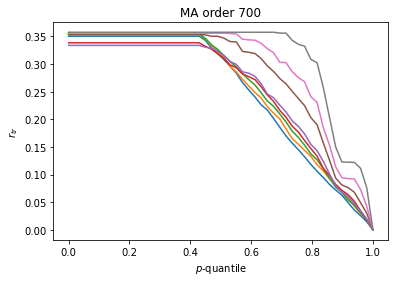

In [180]:
length = 4196
deltas = [0, 1, 2, 4, 8, 16, 32, 64]
rhos = np.linspace(0, 1, 50)
orders = [0, 30, 700]
n_events = 32
repetitions = 100

q_tr_vals = np.zeros((len(orders), len(deltas), len(rhos)))
for i, order in enumerate(orders):
    #timeseries = exponential_ma_model(length, order)
    timeseries =data.iloc[:,5].values
    taus = np.percentile(timeseries, rhos * 100)
    for j, delta in enumerate(deltas):
        for rep in range(repetitions):
            eventseries = np.zeros(length)
            eventseries[np.random.choice(range(length-delta),
                                         size=n_events,
                                         replace=False)] = 1
            q_tr_vals[i, j, :] += (peca.tcp(timeseries, eventseries,
                                            delta, taus) / float(n_events))
        q_tr_vals[i, j, :] /= repetitions
        plt.plot(rhos, q_tr_vals[i, j, :])
        plt.title("MA order %d" % order)
        plt.xlabel("$p$-quantile")
        plt.ylabel("$r_{tr}$")
    plt.show()

In [181]:
def simulate(length, order, n_events, taus, deltas, samples):
    # success probabilities under GEV distribution (our work)
    p_gevs = np.empty((len(taus), len(deltas)))

    # success probabilities under Bernoulli assumption (previous work)
    p_bers = np.empty((len(taus), len(deltas)))

    #timeseries = exponential_ma_model(length, order)
    timeseries =data.iloc[:,5].values
    tcps = np.zeros((len(taus), len(deltas), samples))
    for j, delta in enumerate(deltas):
        # estimate p under GEV distribution
        p_gevs[:, j] = peca.tcp_params_fit(timeseries, delta,
                                           np.array(taus))[0]

        for i, tau in enumerate(taus):
            # estimate p under Bernoulli assumption
            tes = (timeseries > tau) * 1  # threshold exceedance series
            n_exceedance = tes.sum()
            p_bers[i, j] = (1 - (1 - n_exceedance/length)**(delta + 1))

            # Monte Carlo estimate
            for s in tqdm(range(samples),
                          desc=f"delta={delta:0.2f} tau={tau:.2f}"):
                # sample independent event series
                eventseries = np.zeros(length)
                eventseries[np.random.choice(range(length-delta),
                                             size=n_events, replace=False)] = 1

                # record observed number of trigger coincidences
                tcps[i, j, s] = peca.tcp(timeseries, eventseries,
                                         delta, np.array([tau]))[0]

    return {
        "tcps" : tcps,
        "p_gevs" : p_gevs,
        "p_bers" : p_bers
    }

def plot_simulation(sim, i, j, samples, n_events):
    plt.plot(np.sort(sim["tcps"][i, j]),
             ((np.array(range(samples)) + 1) / samples),
             label="emp")
    plt.plot(np.linspace(0, n_events, 1000),
             stats.binom.cdf(np.linspace(0, n_events, 1000),
                             n_events, sim["p_bers"][i, j]),
             label="ber")
    plt.plot(np.linspace(0, n_events, 1000),
             stats.binom.cdf(np.linspace(0, n_events, 1000),
                             n_events, sim["p_gevs"][i, j]),
             label="gev")
    plt.xlim(0, n_events)
    plt.legend()

In [182]:
length = 8192
n_events = 32
taus = [5, 4, 3]
deltas = [7]
samples = 1000

np.random.seed(2)
sim_ma0 = simulate(length, 0, n_events, taus, deltas, samples)
sim_ma32 = simulate(length, 32, n_events, taus, deltas, samples)
sim_ma64 = simulate(length, 64, n_events, taus, deltas, samples)

delta=7.00 tau=3.00: 100%|████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 909.84it/s]


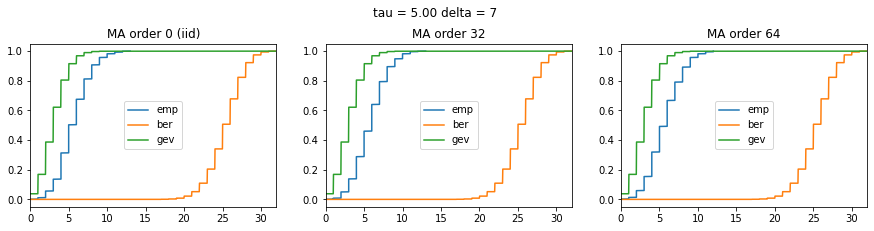

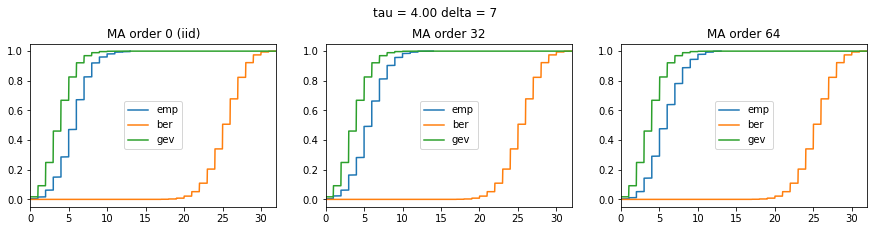

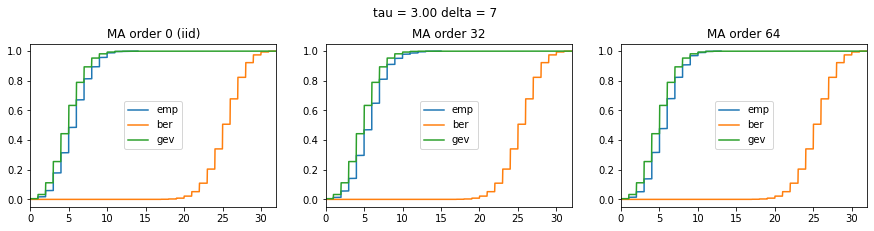

In [183]:
for i in range(len(taus)):
    for j in range(len(deltas)):
        plt.figure(figsize=(15, 3))
        plt.suptitle("tau = %.2f delta = %d" % (taus[i], deltas[j]), y=1.05)

        plt.subplot(131)
        plt.title("MA order 0 (iid)")
        plot_simulation(sim_ma0, i, j, samples, n_events)

        plt.subplot(132)
        plt.title("MA order 32")
        plot_simulation(sim_ma32, i, j, samples, n_events)

        plt.subplot(133)
        plt.title("MA order 64")
        plot_simulation(sim_ma64, i, j, samples, n_events)

        plt.show()


## Figure 9
Simulated trigger coincidence processes under independence, colorized by their surprise value, along with the theoretical minima and maxima.

In [184]:
length = 8192
n_events = 32
order = 8
delta = 7
rhos = np.linspace(0.75, 1, 32)

#timeseries = exponential_ma_model(length, order)
timeseries =data.iloc[:,5].values
eventseries = np.zeros(length)
eventseries[np.random.choice(range(length-delta),
                             size=n_events, replace=False)] = 1

taus = np.percentile(timeseries, rhos * 100)
tcp_params = peca.tcp_params_fit(timeseries, delta, taus)

In [185]:
#Simulate trigger coincidence processes from independent event series
simuls = 1000
simul_nlls = np.zeros(simuls)
simul_tcps = np.zeros((simuls, len(rhos)))
for s in tqdm(range(simuls)):
    simul_eventseries = np.random.permutation(eventseries)
    simul_tcps[s, :] = peca.tcp(timeseries, simul_eventseries, delta, taus)
    simul_nlls[s] = peca.tcp_nll(simul_tcps[s, :], n_events, tcp_params)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 262.62it/s]


## Compute most likely and least likely trigger coincidence process from Markov model
... which corresponds to the highest and lowest possible test statistic values

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:04<00:00,  7.70it/s]


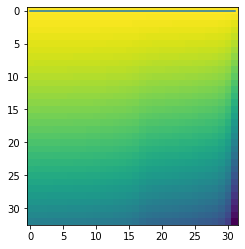

In [186]:
 #find the most likely TCP with dynamic programming
qmax = (-np.infty) * np.ones((n_events + 1, len(rhos)))
qmax[:, 0] = [stats.binom.logpmf(k, n_events, tcp_params[0][0])
              for k in range(0, n_events + 1)]
qargmax = (-1) * np.ones((n_events + 1, len(rhos)), dtype="int")
for m in tqdm(range(1, len(rhos))):
    qmax[:, m] = [np.max([
        (qmax[kprev, m - 1] + stats.binom.logpmf(k, kprev, tcp_params[1][m]))
        for kprev in range(k, n_events + 1)])
                  for k in range(0, n_events + 1)]
    qargmax[:, m] = [k + np.argmax([
        (qmax[kprev, m - 1] + stats.binom.logpmf(k, kprev, tcp_params[1][m]))
        for kprev in range(k, n_events + 1)])
                     for k in range(0, n_events + 1)]

# backtracking to find the best path
mode = np.zeros_like(rhos) * np.nan
m = len(rhos) - 1
k = np.argmax(qmax[:, m])
while k >= 0:
    mode[m] = k
    k = qargmax[k, m]
    m = m - 1

# plot path through DP table
plt.imshow(qmax)
plt.plot(mode)
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:03<00:00,  8.48it/s]


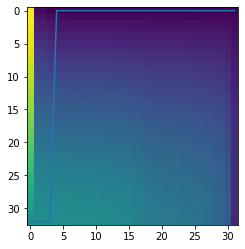

In [187]:
# find the least likely TCP with dynamic programming
qmin = np.infty * np.ones((n_events + 1, len(rhos)))
qmin[:, 0] = [stats.binom.logpmf(k, n_events, tcp_params[0][0])
              for k in range(0, n_events + 1)]
qargmin = (-1) * np.ones((n_events + 1, len(rhos)), dtype="int")
for m in tqdm(range(1, len(rhos))):
    qmin[:, m] = [np.min([
        (qmin[kprev, m - 1] + stats.binom.logpmf(k, kprev, tcp_params[1][m]))
        for kprev in range(k, n_events + 1)])
                  for k in range(0, n_events + 1)]
    qargmin[:, m] = [k + np.argmin([
        (qmin[kprev, m-1] + stats.binom.logpmf(k, kprev, tcp_params[1][m]))
        for kprev in range(k, n_events + 1)])
                     for k in range(0, n_events + 1)]

# backtracking to find the worst path
antimode = np.zeros_like(rhos) * np.nan
m = len(rhos) - 1
k = np.argmin(qmin[:, m])
while k >= 0:
    antimode[m] = k
    k = qargmin[k, m]
    m = m - 1

# plot path through DP table
plt.imshow(qmin)
plt.plot(antimode)
plt.show()

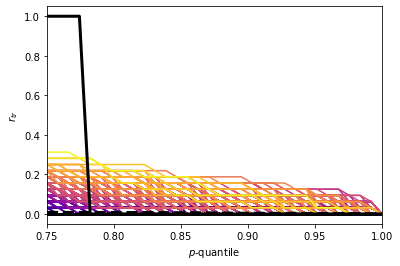

In [188]:
cmap = plt.get_cmap("plasma")

simul_tcps_sorted = simul_tcps[np.argsort(simul_nlls)].copy()
simul_nlls_sorted = simul_nlls.copy()
simul_nlls_sorted.sort()

for tcp, nll in zip(simul_tcps_sorted, simul_nlls_sorted):
    color = ((nll - simul_nlls_sorted[0])
             / (simul_nlls_sorted[-1] - simul_nlls_sorted[0]))
    plt.plot(rhos, tcp/n_events, color=cmap(color), alpha=1)

plt.plot(rhos, mode/n_events, "k-", lw=3, alpha=1)
plt.plot(rhos, antimode/n_events, "k-", lw=3, alpha=1)
plt.plot(rhos, peca.tcp_marginal_expectation(n_events, tcp_params) / n_events,
         "k--", lw=3, alpha=1)
plt.xlabel("$p$-quantile")
plt.ylabel("$r_{tr}$")
plt.xlim((rhos[0], 1))
plt.show()